# Import

In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, normaltest
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product, combinations
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys
from math import comb
from datetime import datetime

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

prospective_preexpert_animals = ['DS_16','BS_85','BS_95','BS_113']#BS_50

act_directory = '..\\..\\Data\\Analysis_Cache'
ops_directory = '..\\..\\Data\\Opsin_Cache'
beh_directory = '..\\..\\Data\\Behavioor'

current_version = 1 #June 22nd, 2023
current_version = 2 #July 11th, 2023
current_version = 3 #July 21th, 2023
current_version = 4 #July 31th, 2023
current_version = 5 #Aug 2nd, 2023
current_version = 6 #Aug 12th, 2023

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))#,'AE_267']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\4thgr\Documents\TothSidleck2024\Notebooks\Figure 4\../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in scalar divide
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finit

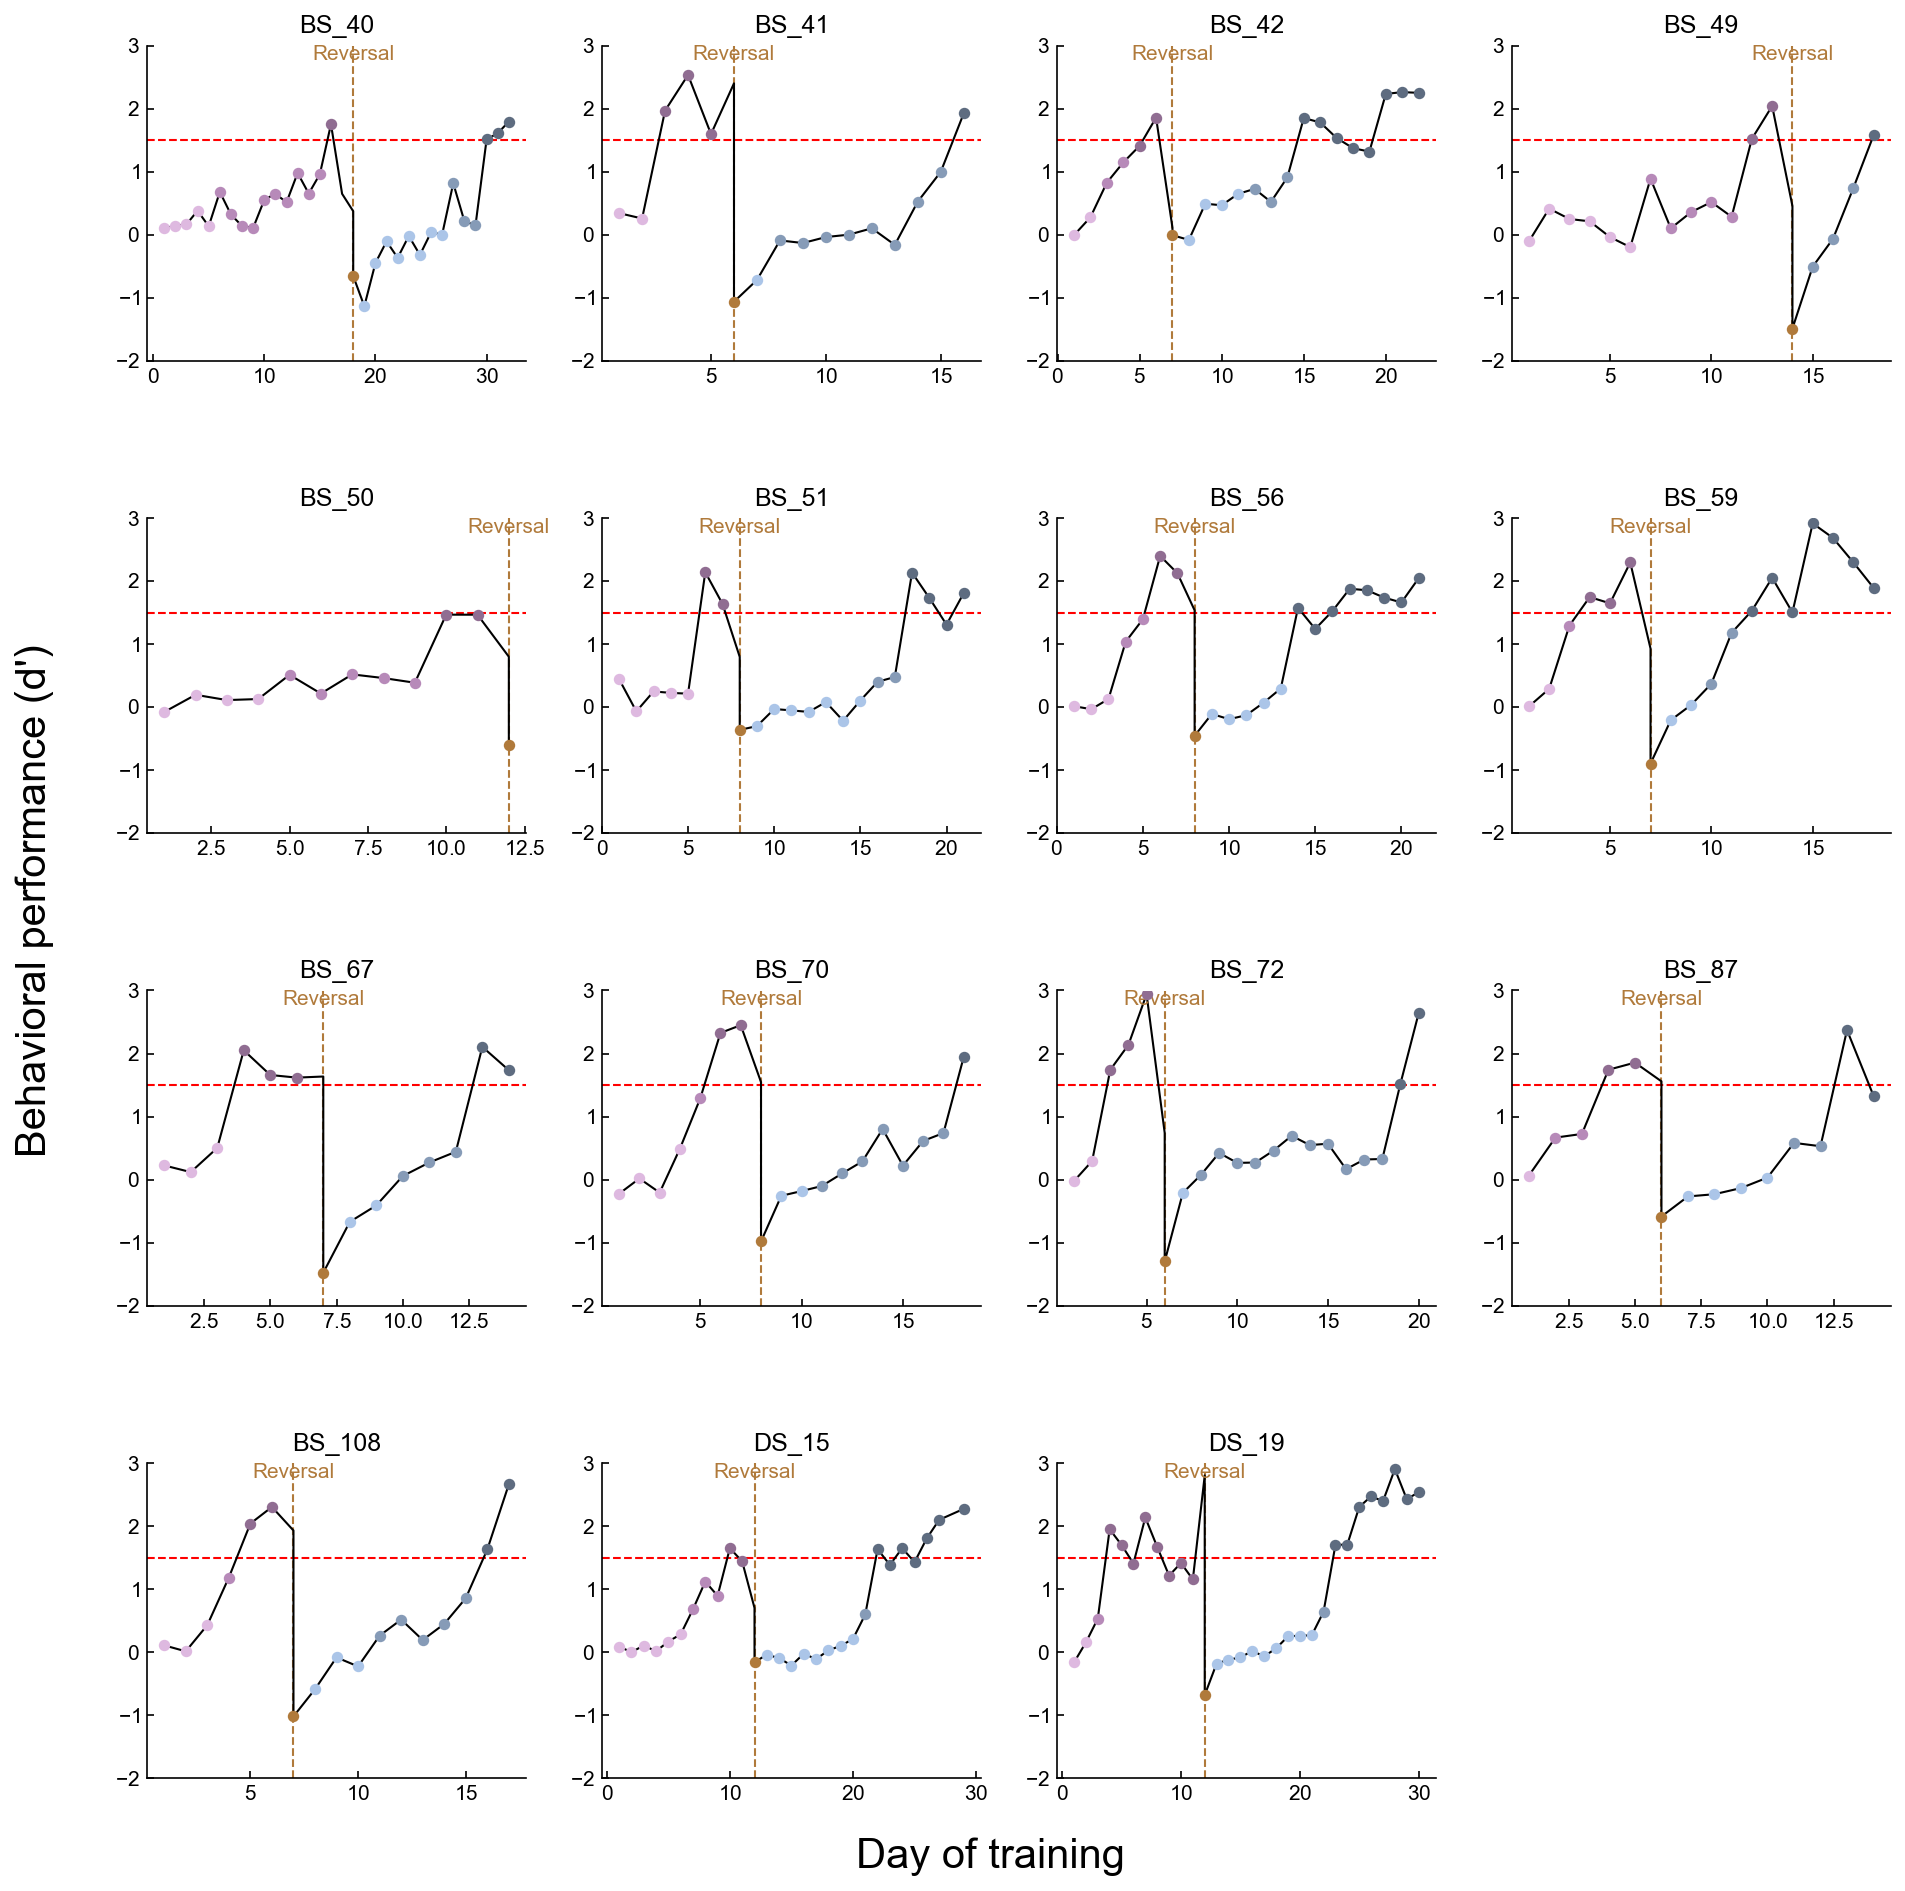

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


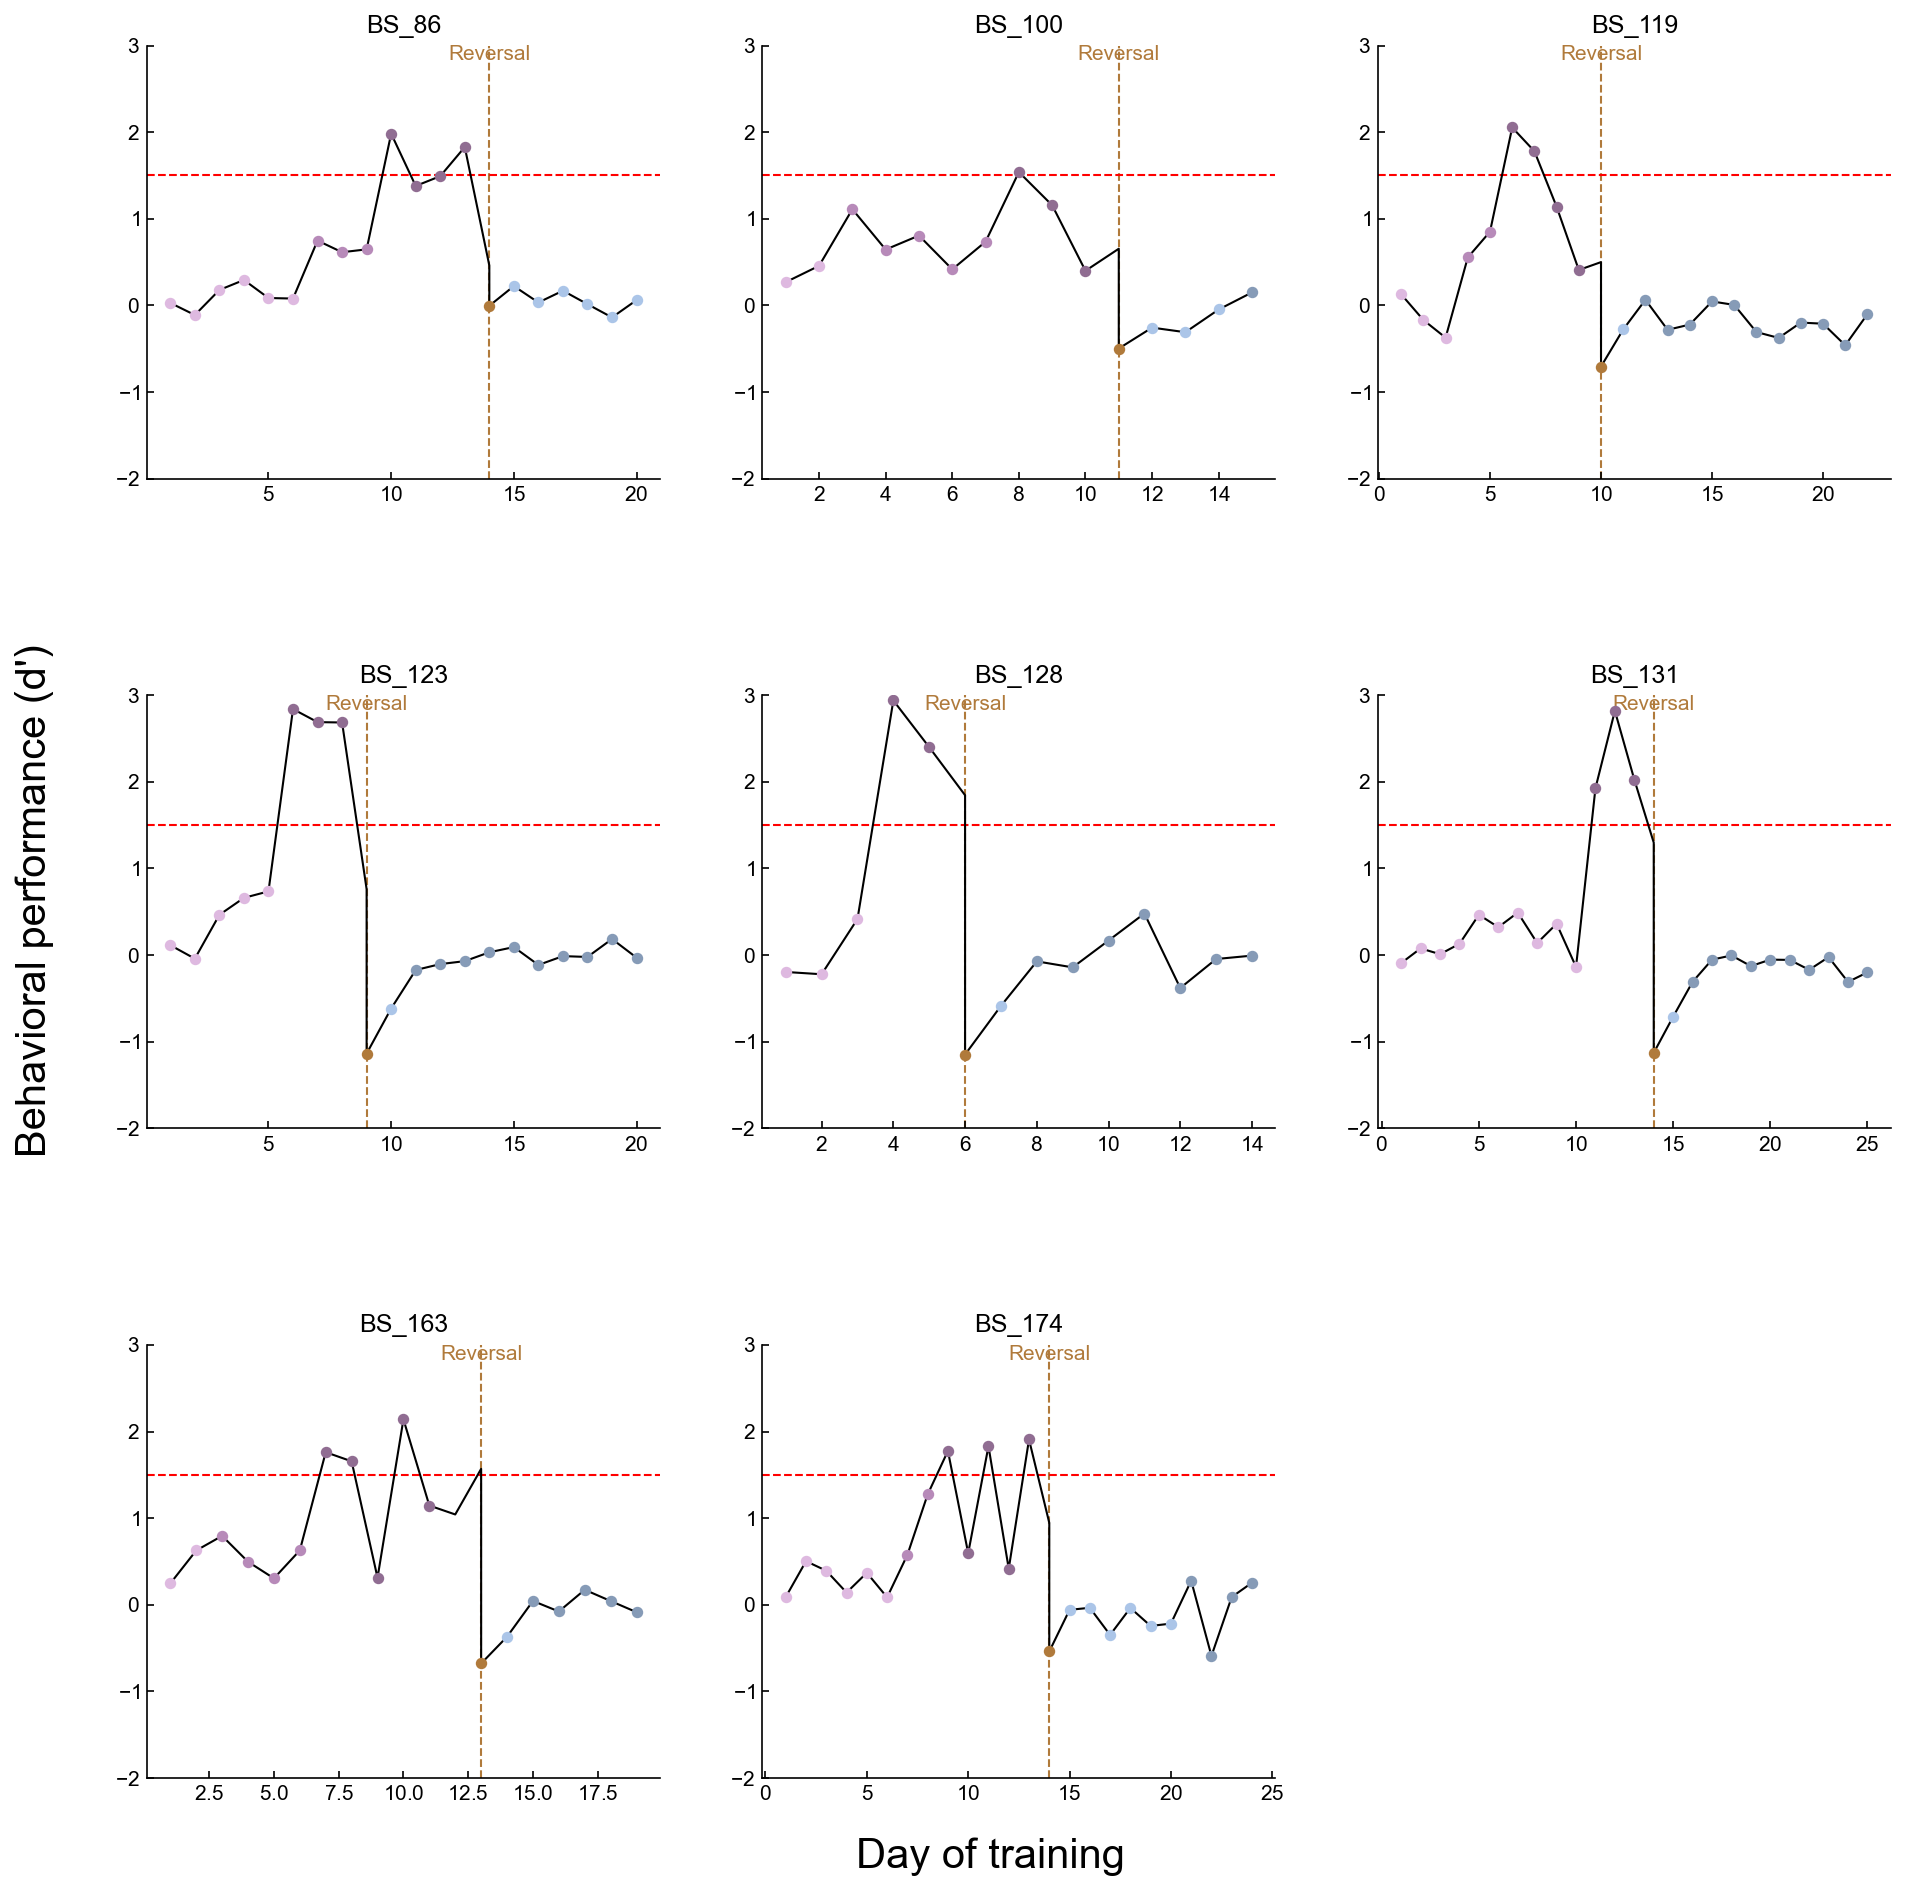

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]

In [5]:
EnumSessionOps = []
# EnumClust = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in did_not_learn:
        continue
        
    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    EnumSessionOps.append(session)
    
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 167/167 [00:17<00:00,  9.63it/s]


In [6]:
EILphasesOps = np.full_like(EnumSessionOps,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionOps)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        rev_day = animalBehaviors[sessionfile.meta.animal].reversal
        day_relative_to_rev = day - rev_day
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphasesOps[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesOps[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesOps[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesOps[idx] = 'pre expert'

#         elif day_relative_to_rev in [1,2]:
#             EILphasesOps[idx] = 'post early'          #CR
#         elif day_relative_to_rev in [3,4]:
#             EILphasesOps[idx] = 'post late'
#         elif day_relative_to_rev >= 5:
#             EILphasesOps[idx] = 'post expert'
            
        elif day_relative_to_rev in [1,2,3,4]:
            EILphasesOps[idx] = 'post early'          #NCR
        elif day_relative_to_rev in [5,6,7]:
            EILphasesOps[idx] = 'post late'
        elif day_relative_to_rev >= 8:
            EILphasesOps[idx] = 'post expert'
    except Exception as e:
#         print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        print(e)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 52/52 [00:03<00:00, 14.74it/s]

errors for: []


In [7]:
EnumSession = []
# EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    EnumSession.append(session)
    
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 740/740 [01:06<00:00, 11.15it/s]


In [8]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 144/144 [00:05<00:00, 25.01it/s]

errors for: []


In [9]:
print('loaded')

loaded


In [10]:
def bootstrap_dimensionality_all_vars(cov_mats,n_frac=0.5,B=200):
    d_GT_list = []
    d_num_list = []
    d_denom_list = []
    
    for idx_B in range(B):
        n = len(cov_mats)
        sample = np.random.choice(cov_mats,n)
#         sample = cov_mats
        
        all_vars = []
        all_covars = []
        for cov in sample:
            if type(cov) is float:
                continue
            cov = np.array(cov)
            if len(cov.shape) < 2:
                continue
            assert cov.shape[0] == cov.shape[1]
            n_clust = cov.shape[0]
            
            new_n = int(n_clust*n_frac)
            if new_n < 1:
                continue
            mask = range(new_n)
            cov= np.array([c[mask] for c in cov[mask]])

            this_vars = cov[np.eye(new_n,new_n,dtype='bool')]
            this_covars = cov[~np.eye(new_n,new_n,dtype='bool')]
            all_vars.append(this_vars)
            all_covars.append(this_covars)
        all_vars = np.concatenate(all_vars)
        all_covars = np.concatenate(all_covars)

        n = len(all_vars)
        avg_sq_vars = np.nanmean(all_vars**2)
        avg_sq_covars = np.nanmean(all_covars**2)
        avg_pred_covars = np.nanmean(np.outer(all_vars,all_vars)[~np.eye(n,n,dtype='bool')])
        
#         d_GT = calc_dim(n,avg_pred_covars/avg_sq_vars,avg_sq_covars/avg_sq_vars)
        d_GT = avg_pred_covars/avg_sq_covars
        d_GT_list.append(d_GT)
        d_num_list.append(avg_pred_covars)
        d_denom_list.append(avg_sq_covars)
        
    d_GT_list = ilep.rmnan(d_GT_list)
    d_GT_estimate = np.mean(d_GT_list)
    SEM_d_GT_estimate = sem(d_GT_list)# / np.sqrt(B)
    
#     d_num_list = ilep.rmnan(d_num_list)
#     d_num_estimate = np.mean(d_num_list)
#     SEM_d_num_estimate = np.std(d_num_list)
    
#     d_denom_list = ilep.rmnan(d_denom_list)
#     d_denom_estimate = np.mean(d_denom_list)
#     SEM_d_denom_estimate = np.std(d_denom_list)

    all_vars = []
    all_covars = []
    for cov in cov_mats:
        if type(cov) is float:
            continue
        cov = np.array(cov)
        if len(cov.shape) < 2:
            continue
        assert cov.shape[0] == cov.shape[1]
        n_clust = cov.shape[0]

        new_n = int(n_clust*n_frac)
        if new_n < 1:
            continue
        mask = range(new_n)
        cov= np.array([c[mask] for c in cov[mask]])

        this_vars = cov[np.eye(new_n,new_n,dtype='bool')]
        this_covars = cov[~np.eye(new_n,new_n,dtype='bool')]
        all_vars.append(this_vars)
        all_covars.append(this_covars)
    all_vars = np.concatenate(all_vars)
    all_covars = np.concatenate(all_covars)
        
    all_vars = ilep.rmnan(all_vars)
    all_covars = ilep.rmnan(np.abs(all_covars)) #abs because only the squared value matters for the calculation
        
    return d_GT_estimate,SEM_d_GT_estimate,  np.mean(all_vars),sem(all_vars),   np.mean(all_covars),sem(all_covars)

In [11]:
def bootstrap_dimensionality_all_vars_median_IQR(cov_mats,n_frac=0.5,B=200):
    d_GT_list = []
    d_num_list = []
    d_denom_list = []
    
    for idx_B in range(B):
        n = len(cov_mats)
        sample = np.random.choice(cov_mats,n)
#         sample = cov_mats
        
        all_vars = []
        all_covars = []
        for cov in sample:
            if type(cov) is float:
                continue
            cov = np.array(cov)
            if len(cov.shape) < 2:
                continue
            assert cov.shape[0] == cov.shape[1]
            n_clust = cov.shape[0]
            
            new_n = int(n_clust*n_frac)
            if new_n < 1:
                continue
            mask = range(new_n)
            cov= np.array([c[mask] for c in cov[mask]])

            this_vars = cov[np.eye(new_n,new_n,dtype='bool')]
            this_covars = cov[~np.eye(new_n,new_n,dtype='bool')]
            all_vars.append(this_vars)
            all_covars.append(this_covars)
        all_vars = np.concatenate(all_vars)
        all_covars = np.concatenate(all_covars)

        n = len(all_vars)
        avg_sq_vars = np.nanmean(all_vars**2)
        avg_sq_covars = np.nanmean(all_covars**2)
        avg_pred_covars = np.nanmean(np.outer(all_vars,all_vars)[~np.eye(n,n,dtype='bool')])
        
#         d_GT = calc_dim(n,avg_pred_covars/avg_sq_vars,avg_sq_covars/avg_sq_vars)
        d_GT = avg_pred_covars/avg_sq_covars
        d_GT_list.append(d_GT)
        d_num_list.append(avg_pred_covars)
        d_denom_list.append(avg_sq_covars)
        
    d_GT_list = ilep.rmnan(d_GT_list)
    d_GT_estimate = np.median(d_GT_list)
    d_GT_Q1_estimate = np.percentile(d_GT_list,25)
    d_GT_Q3_estimate = np.percentile(d_GT_list,75)
    SEM_d_GT_estimate = sem(d_GT_list)# / np.sqrt(B)

    all_vars = []
    all_covars = []
    for cov in cov_mats:
        if type(cov) is float:
            continue
        cov = np.array(cov)
        if len(cov.shape) < 2:
            continue
        assert cov.shape[0] == cov.shape[1]
        n_clust = cov.shape[0]

        new_n = int(n_clust*n_frac)
        if new_n < 1:
            continue
        mask = range(new_n)
        cov= np.array([c[mask] for c in cov[mask]])

        this_vars = cov[np.eye(new_n,new_n,dtype='bool')]
        this_covars = cov[~np.eye(new_n,new_n,dtype='bool')]
        all_vars.append(this_vars)
        all_covars.append(this_covars)
    all_vars = np.concatenate(all_vars)
    all_covars = np.concatenate(all_covars)
        
    all_vars = ilep.rmnan(all_vars)
    all_covars = ilep.rmnan(np.abs(all_covars)) #abs because only the squared value matters for the calculation
    
#     print(f"{np.mean(d_GT_estimate)} +/- {np.std(d_GT_estimate)}")
#     print(f"{d_GT_Q1_estimate} +/- {d_GT_Q3_estimate}")
        
    return d_GT_estimate,d_GT_Q1_estimate,d_GT_Q3_estimate,  np.median(all_vars),np.percentile(all_vars,25),np.percentile(all_vars,75),   np.median(all_covars),np.percentile(all_covars,25),np.percentile(all_covars,75)

In [75]:
with open('..\\..\\Data\\Cov_Mats\\Cov_Mats.pickle', 'rb') as f:
    Data = pickle.load(f)

with open('..\\..\\Data\\Cov_Mats\\Cov_Mats_Opto_On.pickle', 'rb') as f:
    Data_On = pickle.load(f)
mask = np.isin(Data_On.sessions,EnumSessionOps)
Data_On.sessions = np.array(Data_On.sessions,dtype='object')[mask]
Data_On.cov_mats = np.array(Data_On.cov_mats,dtype='object')[mask]
Data_On.cov_mats_CR = np.array(Data_On.cov_mats_CR,dtype='object')[mask]
Data_On.cov_mats_NCR = np.array(Data_On.cov_mats_NCR,dtype='object')[mask]
# Data_On.cov_mats_CRNCR = np.array(Data_On.cov_mats_CRNCR,dtype='object')[mask]

In [76]:
len(EILphases)

144

In [77]:
len(Data.cov_mats)

144

In [78]:
len(EnumSession)

144

In [79]:
len(EnumSessionOps)

52

In [80]:
len(Data_On.sessions)

52

In [ ]:
# Problem is with cloudy data sessions. Remove from Data_On

In [85]:
animals_list = []
sessions_list = []
learning_phases_list = []
clust_1_list = []
clust_2_list = []
covariance_list = []
condition_list = []

for idx,session in enumerate(EnumSession):
    sessionfile = ilep.loadSessionCached(act_directory,session)

    cov_mat = Data.cov_mats_NCR[idx]
    
    clusts = sessionfile.clusters.good
    NCR_clusts = []
    for clust in clusts:
        if sessionfile.responsiveness[clust]['all_trials'].FRmodulation < 3.5:
            NCR_clusts.append(clust)

    if type(cov_mat) == float and np.isnan(cov_mat) and len(NCR_clusts) <= 1:
        print(f"{session} has nan cov_mat with clusts {clusts}, {NCR_clusts} NCRs")
        continue
    elif type(cov_mat) == float and (len(NCR_clusts) != 1):
        raise Exception('Incorrect length')
    elif (cov_mat.shape[0] == 0) and (len(NCR_clusts) == 0):
        continue
    else:
        assert cov_mat.shape[0] == cov_mat.shape[1]
        assert cov_mat.shape[0] == len(NCR_clusts)

    for idx1,clust_1 in enumerate(NCR_clusts):
        for idx2,clust_2 in enumerate(NCR_clusts):
            covar = cov_mat[idx1,idx2]

            animals_list.append(sessionfile.meta.animal)
            sessions_list.append(session)
            learning_phases_list.append(EILphases[idx])
            clust_1_list.append(clust_1)
            clust_2_list.append(clust_2)
            covariance_list.append(covar)
            condition_list.append('control')

print()
print()
print()

for idx,session in enumerate(EnumSessionOps):
    sessionfile = ilep.loadSessionCached(ops_directory,session)

    cov_mat = Data_On.cov_mats_NCR[idx]
    
    clusts = sessionfile.clusters.good
    NCR_clusts = []
    for clust in clusts:
        if sessionfile.responsiveness[clust]['laser_off'].FRmodulation < 1.8:  #Note this corresponds to CRNCRcond not cond
            NCR_clusts.append(clust)

    try:
        if type(cov_mat) == float and np.isnan(cov_mat) and len(NCR_clusts) <= 1:
            print(f"{session} has nan cov_mat with clusts {clusts}, {NCR_clusts} NCRs")
            continue
        elif type(cov_mat) == float and (len(NCR_clusts) != 1):
            raise Exception('Incorrect length')
        elif (cov_mat.shape[0] == 0) and (len(NCR_clusts) == 0):
            continue
        else:
            assert cov_mat.shape[0] == cov_mat.shape[1]
            assert cov_mat.shape[0] == len(NCR_clusts)
    except Exception as e:
        print(session)
        print(Data_On.sessions[idx])
        print(cov_mat.shape)
        print(NCR_clusts)
        print(cov_mat)
        raise e

    for idx1,clust_1 in enumerate(NCR_clusts):
        for idx2,clust_2 in enumerate(NCR_clusts):
            covar = cov_mat[idx1,idx2]

            animals_list.append(sessionfile.meta.animal)
            sessions_list.append(session)
            learning_phases_list.append(EILphasesOps[idx])
            clust_1_list.append(clust_1)
            clust_2_list.append(clust_2)
            covariance_list.append(covar)
            condition_list.append('opto')

BS_40_11_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_40_13_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_41_3_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_49_10_AC.pickle has nan cov_mat with clusts [12], [12] NCRs
BS_49_13_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_49_15_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_50_10_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_50_11_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_50_4_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_50_6_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_51_3_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_56_2_AC.pickle has nan cov_mat with clusts [9], [] NCRs
BS_67_3_AC.pickle has nan cov_mat with clusts [26], [26] NCRs
BS_70_3_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_72_11_AC.pickle has nan cov_mat with clusts [], [] NCRs
BS_87_10_AC.pickle has nan cov_mat with clusts [4], [] NCRs
BS_87_2_AC.pickle has nan cov_mat with clusts [25], [

In [86]:
df_dict = dict()
df_dict['animal'] = animals_list
df_dict['session'] = sessions_list
df_dict['phase'] = learning_phases_list
df_dict['clust 1'] = clust_1_list
df_dict['clust 2'] = clust_2_list
df_dict['covariance'] = covariance_list
df_dict['condition'] = condition_list
df = pd.DataFrame(df_dict)

In [87]:
df

,animal,session,phase,clust 1,clust 2,covariance,condition
0,BS_108,BS_108_3_AC.pickle,switch,35,35,45.964603,control
1,BS_108,BS_108_3_AC.pickle,switch,35,44,-6.647293,control
2,BS_108,BS_108_3_AC.pickle,switch,35,81,0.470416,control
3,BS_108,BS_108_3_AC.pickle,switch,35,144,-1.645182,control
4,BS_108,BS_108_3_AC.pickle,switch,35,155,2.205966,control
...,...,...,...,...,...,...,...
21729,BS_86,BS_86_6_opto_AC.pickle,post late,141,96,-0.042128,opto
21730,BS_86,BS_86_6_opto_AC.pickle,post late,141,101,0.933327,opto
21731,BS_86,BS_86_6_opto_AC.pickle,post late,141,124,NaN,opto
21732,BS_86,BS_86_6_opto_AC.pickle,post late,141,133,NaN,opto


91.89077698004697
71.41486984150508
177.6498608643346

266.0876252770614
239.57466537672772
292.90897540751047

417.7920789005743
384.1036446546408
463.63580864950876

82.59941027634542
67.28497500344932
102.33679298578235

775.9798270611692
775.9798270611692
775.9798270611692

150.04230318432445
115.91726440860015
212.59827813719443



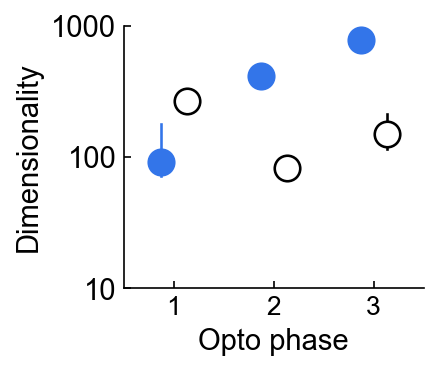

In [90]:
# with open('D:\\Cov_Mats_Opto_On.pickle', 'rb') as f:
#     Data_On = pickle.load(f)    
# with open('D:\\Cov_Mats.pickle', 'rb') as f:
#     Data = pickle.load(f)
    
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')
        
fig,ax = make_axis_size(2, 1.75, left=.3, bottom=.3, right=0, top=0)
sz=150
s_wid=1.25
offset=0.13
switch_offset=0
        
# #Remove Cloudy data
# np.isin(Data_On.sessions,EnumSessionOps)
# Data_On.cov_mats_NCR = np.array(Data_On.cov_mats_NCR)[np.isin(Data_On.sessions,EnumSessionOps)]

################################################################################################################################################################

phases = ['post early','post late','post expert']
# phases = ['post late']
for idx,phase in enumerate(phases):
    phase_mask = np.char.equal(EILphasesOps,phase)
    phase_mask_control = np.char.equal(EILphases,phase)

    cov_mats = np.array(Data_On.cov_mats_NCR,dtype='object')[phase_mask]
    
#     print(len(cov_mats))
#     for mat in cov_mats:
#         if type(mat) == float:
#             continue
#         n = len(mat)
#         if n < 2:
#             continue
#         covs = mat[~np.eye(n,n,dtype='bool')]
#         print(f"{np.mean(covs)} +/- {np.std(covs)}")
    
    
    #[~np.eye(n,n,dtype='bool')]
    
    M,Q1,Q3,Mnum,Q1num,Q3num,Mden,Q1den,Q3den = bootstrap_dimensionality_all_vars_median_IQR(cov_mats,n_frac = 1,B=2000)
    
    print(M)
    print(Q1)
    print(Q3)
    print()
    
    ax.scatter(idx-offset,np.log10(M),c=LASER_COLOR,s=sz,lw=s_wid)
    ax.plot([idx-offset,idx-offset],[np.log10(Q1),np.log10(Q3)],c=LASER_COLOR,lw=s_wid)

    cov_mats = np.array(Data.cov_mats_NCR,dtype='object')[phase_mask_control]
    M,Q1,Q3,Mnum,Q1num,Q3num,Mden,Q1den,Q3den = bootstrap_dimensionality_all_vars_median_IQR(cov_mats,n_frac = 1,B=2000)
    ax.scatter(idx+offset,np.log10(M),fc='white',ec='k',s=sz,lw=s_wid,zorder=10)
    ax.plot([idx+offset,idx+offset],[np.log10(Q1),np.log10(Q3)],c='k',lw=s_wid)
    
    print(M)
    print(Q1)
    print(Q3)
    print()
    
# ax.scatter([],[],c='k',label='Log(dimm)')
# ax.scatter([],[],c='r',label='Log(pred_cov)')
# lgd = ax.legend(frameon=False,loc=(0.6,1))

# ax.set_ylim([0,1])
# ax.set_yticks([0,np.log10(2),np.log10(4),np.log10(6),np.log10(8),1])
# ax.set_yticklabels(['1','2','4','6','8','10'])
ax.set_ylim([1,3])
ax.set_yticks([1,2,3])
ax.set_yticklabels(['10','100','1000'])
ax.set_ylabel('Dimensionality')
    
labels = ['1','2','3']
ax.set_xlim([-0.5,2.5])
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.set_xlabel('Opto phase')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
    
artists = []
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto vs Control dimensionality NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=artists, bbox_inches='tight')

2.7231858397719804
0.13350563178548241
2.0163447150711082
0.12261855919952876
1.3470001507232445
0.06920145315370876


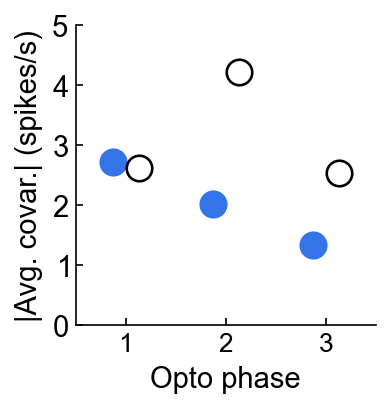

In [92]:
# with open('D:\\Cov_Mats_Opto_On.pickle', 'rb') as f:
#     Data_On = pickle.load(f)    
# with open('D:\\Cov_Mats.pickle', 'rb') as f:
#     Data = pickle.load(f)
    
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')
        
fig,ax = make_axis_size(2, 2, left=.3, bottom=.3, right=0, top=0)
sz=150
s_wid=1.25
offset=0.13
switch_offset=0
        
# #Remove Cloudy data
# np.isin(Data_On.sessions,EnumSessionOps)
# Data_On.cov_mats_NCR = np.array(Data_On.cov_mats_NCR)[np.isin(Data_On.sessions,EnumSessionOps)]

################################################################################################################################################################

phases = ['post early','post late','post expert']
for idx,phase in enumerate(phases):
    phase_mask = np.char.equal(EILphasesOps,phase)
    phase_mask_control = np.char.equal(EILphases,phase)
    
    cov_mats = np.array(Data_On.cov_mats_NCR,dtype='object')[phase_mask]
    M,SEM,Mnum,SEMnum,Mden,SEMden = bootstrap_dimensionality_all_vars(cov_mats,n_frac = 1,B=2000)
    ax.scatter(idx-offset,(Mden),c=LASER_COLOR,s=sz,lw=s_wid,zorder=10)
    ax.plot([idx-offset,idx-offset],[(Mden-SEMden),(Mden+SEMden)],c=LASER_COLOR,lw=s_wid)
#     M,Q1,Q3,Mnum,Q1num,Q3num,Mden,Q1den,Q3den = bootstrap_dimensionality_all_vars(cov_mats,n_frac = 1,B=2000)
#     ax.scatter(idx-offset,np.log10(Mden),c=LASER_COLOR,s=sz,lw=s_wid,zorder=10)
#     ax.plot([idx-offset,idx-offset],[np.log10(Q1den),np.log10(Q3den)],c=LASER_COLOR,lw=s_wid)
    
    print(Mden)
    print(SEMden)
    
    cov_mats = np.array(Data.cov_mats_NCR,dtype='object')[phase_mask_control]
    M,SEM,Mnum,SEMnum,Mden,SEMden = bootstrap_dimensionality_all_vars(cov_mats,n_frac = 1,B=2000)
    ax.scatter(idx+offset,(Mden),ec='k',fc='white',s=sz,lw=s_wid,zorder=10)
    ax.plot([idx+offset,idx+offset],[(Mden-SEMden),(Mden+SEMden)],c='k',lw=s_wid)
    
# ax.scatter([],[],c='k',label='Log(dimm)')
# ax.scatter([],[],c='r',label='Log(pred_cov)')
# lgd = ax.legend(frameon=False,loc=(0.6,1))

# ax.set_ylim([0,1])
# ax.set_yticks([0,np.log10(2),np.log10(4),np.log10(6),np.log10(8),1])
# ax.set_yticklabels(['1','2','4','6','8','10'])
ax.set_ylim([0,5])
ax.set_yticks([0,1,2,3,4,5])
ax.set_ylabel('|Avg. covar.| (spikes/s)')
    
labels = ['1','2','3']
ax.set_xlim([-0.5,2.5])
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.set_xlabel('Opto phase')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
    
artists = []
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto vs Control Avg Sq Covar NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=artists, bbox_inches='tight')

1.5518603726049942
0.06877619878409781
4.4532949323715805
0.24636525180148025
3.2297936364192346
0.522558208415508
2.6266010737105723
0.06396787561996502
4.218047388001883
0.1734221267252399
2.542607595196138
0.15116533978776653


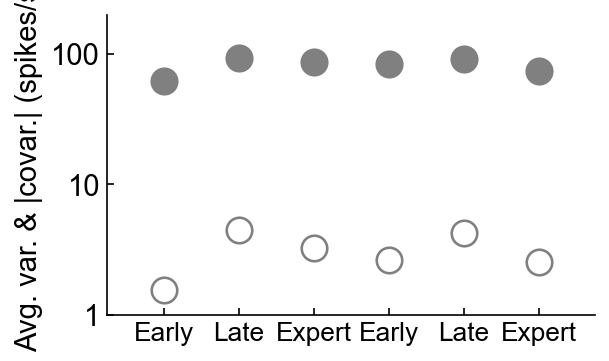

In [35]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')
        
fig,ax = make_axis_size(3.25, 2, left=.3, bottom=.3, right=0, top=0)
sz=150
s_wid=1.25
offset=0#.175
switch_offset=0
        
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
for idx,phase in enumerate(phases):
    phase_mask = np.char.equal(EILphases,phase)
    
#     cov_mats = np.array(Data.cov_mats)[phase_mask]
#     M,SEM = bootstrap_dimensionality(cov_mats,n_frac = 1,B=2000)
#     ax.scatter(idx-offset,M,c='k',s=sz,lw=s_wid)
#     ax.plot([idx-offset,idx-offset],[M-SEM,M+SEM],c='k',lw=s_wid)
    
    cov_mats = np.array(Data.cov_mats_NCR,dtype='object')[phase_mask]
    M,SEM,Mnum,SEMnum,Mden,SEMden = bootstrap_dimensionality_all_vars(cov_mats,n_frac = 1,B=2000)
    
#     ax.scatter(idx-offset,np.log10(M),c='k',s=sz,lw=s_wid)
#     ax.plot([idx-offset,idx-offset],[np.log10(M-SEM),np.log10(M+SEM)],c='k',lw=s_wid)
    
    ax.scatter(idx-0*offset,np.log10(Mnum),c='gray',s=sz,lw=s_wid,zorder=10)
    ax.plot([idx-0*offset,idx-0*offset],[np.log10(Mnum-SEMnum),np.log10(Mnum+SEMnum)],c='gray',lw=s_wid)
    
    ax.scatter(idx+offset,np.log10(Mden),fc='white',ec='gray',s=sz,lw=s_wid,zorder=10)
    ax.plot([idx+offset,idx+offset],[np.log10(Mden-SEMden),np.log10(Mden+SEMden)],c='gray',lw=s_wid)
    
    print(Mden)
    print(SEMden)
    
#     cov_mats = np.array(Data.cov_mats_CR)[phase_mask]
#     M,SEM,_,_,_,_ = bootstrap_dimensionality(cov_mats,n_frac = 1,B=2000)
#     ax.scatter(idx+offset,M,c=CR_COLOR,s=sz,lw=s_wid)
#     ax.plot([idx+offset,idx+offset],[M-SEM,M+SEM],c=CR_COLOR,lw=s_wid)

# ax.scatter([],[],c='k',label='Log(dimm)')
# ax.scatter([],[],c='r',label='Log(pred_cov)')
# ax.scatter([],[],c='b',label='-Log(avg_cov)')
# lgd = ax.legend(frameon=False,loc=(0.6,1))

# ax.set_ylim([0,3])
# ax.set_yticks([0,1,2,3])
# ax.set_yticklabels(['1','10','100','1000'])
# ax.set_ylabel('|Avg. var. & covar.| (spikes/s)')
ax.set_ylim([0,np.log10(200)])
ax.set_yticks([0,1,2])
ax.set_yticklabels(['1','10','100'])
ax.set_ylabel('Avg. var. & |covar.| (spikes/s)')

# ax.set_ylim([0,1000])
# ax.set_ylabel('Dimensionality')
# ax.set_yticks([0,200,400,600,800,1000])
# ax.set_yticklabels([str(s) for s in [0,200,400,600,800,1000]])
    
labels = ['Early','Late','Expert','Early','Late','Expert']
ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
    
artists = []
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Dimensionality var & covar network-level NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=artists, bbox_inches='tight')

# Debug Code

In [34]:
def get_separable_rates(sessionfile,clusts,cond,bin_length_msec=50,pre_stim_padding_sec = 0.2,trialsPerDayLoaded=None):
    if type(clusts) == int or type(clusts) == float:
        clusts = [clusts]
    assert type(clusts) == list or type(clusts) == np.ndarray
    
    #allConds = ilep.getAllConditions(sessionfile,None,trialsPerDayLoaded=trialsPerDayLoaded)
    #trials = allConds[cond].trials
    trials = range(sessionfile.meta.length_in_trials)
    
    n_clusts = len(clusts)
    n_trials = len(trials)
    n_bins = int((sessionfile.meta.triallength+pre_stim_padding_sec)*1000 / bin_length_msec)
    
    rates_per_clust = dict()
    rates_per_clust['trials'] = trials
    for clust in clusts:
        rates_per_clust[clust] = []
    
    for clust in clusts:
        clust_rates = []
        clust_spikes = ilep.getSpikeTimes(sessionfile,clust=clust)
        
        for trial_idx,trial in enumerate(trials):
            trial_rates = np.full(n_bins,np.nan)
            for bin_idx,bin in enumerate(range(n_bins)):
                bin_start = sessionfile.trials.starts[trial] - pre_stim_padding_sec * sessionfile.meta.fs + bin*(bin_length_msec/1000*sessionfile.meta.fs)
                bin_end = bin_start + bin_length_msec/1000*sessionfile.meta.fs
                spike_times = ilep.getSpikeTimes(sessionfile,starttime=bin_start,endtime=bin_end,cachedtimes=clust_spikes)
                trial_rates[bin_idx] = len(spike_times) / bin_length_msec * 1000
            clust_rates.append(trial_rates)
        rates_per_clust[clust] = clust_rates
    return rates_per_clust

In [41]:
def get_trimmed_cov_mat(sessionfile,independent_trial_threshold=100,paired_trial_threshold=100,cond='all_trials',bin_length=50):
    clusts = sessionfile.clusters.good
    with open('..\\..\\Data\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)
    
    #Calculate variances
    rates = get_separable_rates(sessionfile,clusts,cond,bin_length_msec=bin_length,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)
    cov_mat = np.full((len(clusts),len(clusts)),np.nan)
    for clust_idx,clust in enumerate(clusts):
        clust_rates = np.array(rates[clust])
        trials = ilep.getAllConditions(sessionfile,clust)[cond].trials
        if len(trials) < independent_trial_threshold:
            cov_mat[clust_idx,clust_idx] = np.nan
            continue
        clust_rates = np.concatenate(clust_rates[trials])
        cov_mat[clust_idx,clust_idx] = float(np.cov(clust_rates))
    
    #Calculate pairwise covariances -- trim according to paired cells
    for i,clust_i in enumerate(clusts):
        for j,clust_j in enumerate(clusts):
            if i==j:
                continue
            
            #Remove covariances between cells with no overlapping firing
            allConds = ilep.getAllConditions(sessionfile,[clust_i,clust_j])
            if len(allConds[cond].trials) < paired_trial_threshold:
                cov_mat[i,j] = np.nan
                cov_mat[j,i] = np.nan
                continue
            
            #Extract paired rates
            trials_involved = allConds[cond].trials
            clust_i_rates = np.array(rates[clust_i])
            clust_i_rates = np.concatenate(clust_i_rates[trials_involved])
            clust_j_rates = np.array(rates[clust_j])
            clust_j_rates = np.concatenate(clust_j_rates[trials_involved])
            paired_rates = np.vstack((clust_i_rates,clust_j_rates))
            
            #Calculate paired covariances
            paired_cov_mat = np.cov(paired_rates)
            assert paired_cov_mat.shape == (2,2)
            assert paired_cov_mat[0,1] == paired_cov_mat[1,0]
            cov_mat[i,j] = paired_cov_mat[0,1]
            cov_mat[j,i] = paired_cov_mat[0,1]
            
    return cov_mat

In [42]:
def calculate_cov_mats(directory,session,cond='all_trials',CR_NCR_thresh=3.5,CRNCRcond=None,bin_length=50):
    if CRNCRcond is None:
        CRNCRcond = cond
    sessionfile = ilep.loadSessionCached(directory,session)
    ensemble = sessionfile.clusters.good
    n_clust = len(ensemble)
    if (n_clust < 2):
        return np.nan,np.nan,np.nan,np.nan
    
    with open('..\\..\\Data\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)
        
    cov_mat = get_trimmed_cov_mat(sessionfile,cond=cond,bin_length=bin_length)
#     rates = ilep.flatten_rates(sessionfile,ensemble,'all_trials',bin_length_msec=50,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)
#     cov_mat = np.cov(rates)
    
    FRmods = [sessionfile.responsiveness[clust][CRNCRcond].FRmodulation for clust in ensemble]
    mask_CR = np.greater_equal(FRmods,CR_NCR_thresh)
    mask_NCR = np.less(FRmods,CR_NCR_thresh)
    
    cov_mat_CR = np.array([c[mask_CR] for c in cov_mat[mask_CR]])
    cov_mat_NCR = np.array([c[mask_NCR] for c in cov_mat[mask_NCR]])
    
    cov_mat_CRNCR = np.copy(cov_mat)
    for i in range(len(FRmods)):
        for j in range(len(FRmods)):
            if mask_CR[i] and mask_CR[j]:
                cov_mat_CRNCR[i,j] = np.nan
            if mask_NCR[i] and mask_NCR[j]:
                cov_mat_CRNCR[i,j] = np.nan
    
    return cov_mat,cov_mat_CR,cov_mat_NCR,cov_mat_CRNCR
    
def calculate_dimm(cov_mat):
    assert cov_mat.shape[0] == cov_mat.shape[1]
    n_clust = cov_mat.shape[0]

    variances = cov_mat[np.eye(n_clust,n_clust,dtype='bool')]
    covariances = cov_mat[~np.eye(n_clust,n_clust,dtype='bool')]

    avg_sq_vars = np.mean(variances**2)
    avg_sq_covars = np.mean(covariances**2)
    avg_pred_covars = np.mean(np.outer(variances,variances)[~np.eye(n_clust,n_clust,dtype='bool')])
    
    d_var = (1+(n_clust-1)*(avg_pred_covars / avg_sq_vars))         /          (1+(n_clust-1)*0)
    d_cov = (1+(n_clust-1)*1)                                       /          (1+(n_clust-1)*(avg_sq_covars / avg_sq_vars))
    d_GT  = (1+(n_clust-1)*(avg_pred_covars / avg_sq_vars))         /          (1+(n_clust-1)*(avg_sq_covars / avg_sq_vars))
    
    return avg_sq_vars,avg_sq_covars,avg_pred_covars

# for session in tqdm(EnumSession):
#     try:
#         a,b,c = calculate_avg_sq_var(act_directory,session)        
#         sq_vars.append(a)
#         sq_covars.append(b)
#         pred_covars.append(c)
#     except Exception as e:
#         print(f"{session} error: {e}"

In [43]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in ['BS_128_10_opto_AC.pickle']:
    try:
        a,b,c,d = calculate_cov_mats(ops_directory,session,cond='laser_on',CR_NCR_thresh=1.8,CRNCRcond='laser_off')
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

In [48]:
cov_mats

[array([[ 1.55659508e+02, -4.64829139e-01,  4.65466482e+01,
          1.15376037e+01,  7.66532249e+00,  6.31444909e+01,
          4.99077612e+01],
        [-4.64829139e-01,  7.29814218e+01,  3.55594291e+00,
          2.89168157e+00,  3.05650793e+00,  9.38450726e+00,
          5.32767677e+00],
        [ 4.65466482e+01,  3.55594291e+00,  2.04843463e+02,
          8.80827079e+00,  2.15248073e+01,  1.50061393e+02,
          3.63460950e+01],
        [ 1.15376037e+01,  2.89168157e+00,  8.80827079e+00,
          5.38322388e+01,  2.47795086e+00,  3.55718913e+01,
          4.05067274e+01],
        [ 7.66532249e+00,  3.05650793e+00,  2.15248073e+01,
          2.47795086e+00,  5.62098918e+01,  3.17524689e+01,
          6.90773705e+00],
        [ 6.31444909e+01,  9.38450726e+00,  1.50061393e+02,
          3.55718913e+01,  3.17524689e+01,  1.30430522e+03,
          8.05219096e+01],
        [ 4.99077612e+01,  5.32767677e+00,  3.63460950e+01,
          4.05067274e+01,  6.90773705e+00,  8.05219096e+01

In [52]:
print(session)
sessionfile = ilep.loadSessionCached(ops_directory,session)

BS_128_10_opto_AC.pickle


In [54]:
sessionfile.clusters.good

array([ 1,  2,  9, 12, 14, 15, 21], dtype=int64)